<a href="https://colab.research.google.com/github/DavorJordacevic/NEURAL-NETWORKS-/blob/master/Keras_Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import keras
import warnings
from matplotlib import cm
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import adam
from keras.datasets import mnist
from keras.regularizers import L1L2
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
warnings.filterwarnings("ignore")

Using TensorFlow backend.


In [0]:
seed = 3
np.random.seed(seed)

In [3]:
X, y = make_blobs(n_samples=6000, centers=2, n_features=2,random_state=40)
print(X.shape)
print(y.shape)
print(type(X))
print(type(y))

# Spliting data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

(6000, 2)
(6000,)
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


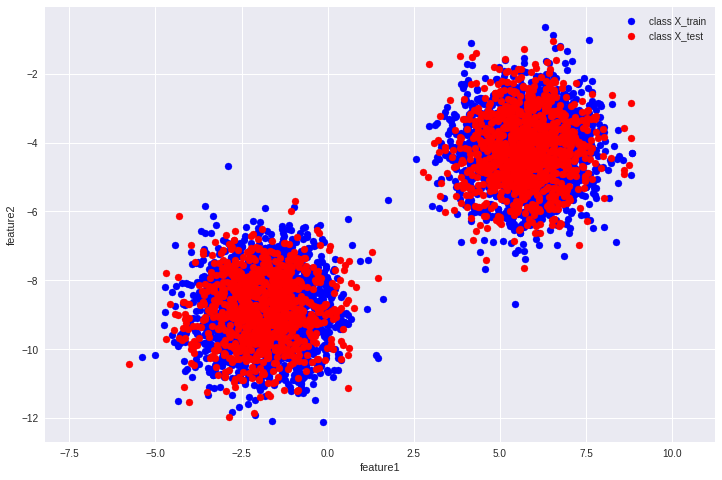

In [4]:
plt.figure(figsize=(12,8))
plt.scatter(X_train[:,0],X_train[:,1], color = 'b', label = 'class X_train')
plt.scatter(X_test[:,0],X_test[:,1], color = 'r', label = 'class X_test')
plt.xlabel('feature1')
plt.ylabel('feature2')
plt.legend()
plt.axis('equal')
plt.show()

In [0]:
# Hyper-parameters
training_epochs = 100 # Total number of training epochs
learning_rate = 0.03 # The learning rate

In [0]:
# create model
def create_model():
  model = Sequential()
  model.add(Dense(1, input_dim=2, kernel_initializer='normal',
                  kernel_regularizer=L1L2(l1=0.0, l2=0.3),activation='sigmoid'))
 
  # Compile model
  model.compile(loss='mse', optimizer='rmsprop', metrics=['accuracy'])
  return model

model = create_model()

In [0]:
results =  model.fit(
           X_train, y_train,
           epochs= training_epochs,
           batch_size = 64,
           validation_data = (X_test, y_test),
           verbose = 0
)

In [0]:
prediction_values = model.predict_proba(X_test)

In [19]:
print(np.mean(results.history["val_acc"]))

0.999969696969697


In [20]:
print("Evaluating on training set...")
(loss, accuracy) = model.evaluate(X_train, y_train.T)
print("loss={:.4f}, accuracy: {:.4f}%".format(loss,accuracy * 100))

print("Evaluating on testing set...")
(loss, accuracy) = model.evaluate(X_test, y_test.T)
print("loss={:.4f}, accuracy: {:.4f}%".format(loss,accuracy * 100))

Evaluating on training set...
4020/4020 [==============================] - 0s 17us/step
loss=0.0716, accuracy: 100.0000%
Evaluating on testing set...
1980/1980 [==============================] - 0s 17us/step
loss=0.0716, accuracy: 100.0000%


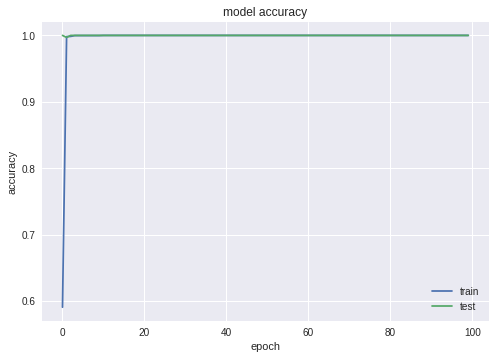

In [21]:
# summarize history for accuracy
plt.plot(results.history['acc'])
plt.plot(results.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='down right')

Maximum Loss : 0.2652

Minimum Loss : 0.0716

Loss difference : 0.1936


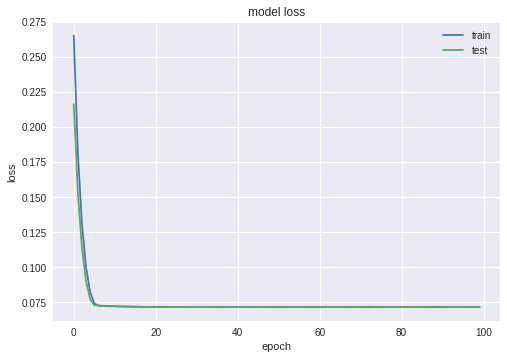

In [22]:
# summarize history for loss
plt.plot(results.history['loss'])
plt.plot(results.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

max_loss = np.max(results.history['loss'])
min_loss = np.min(results.history['loss'])
print("Maximum Loss : {:.4f}".format(max_loss))
print("")
print("Minimum Loss : {:.4f}".format(min_loss))
print("")
print("Loss difference : {:.4f}".format((max_loss - min_loss)))

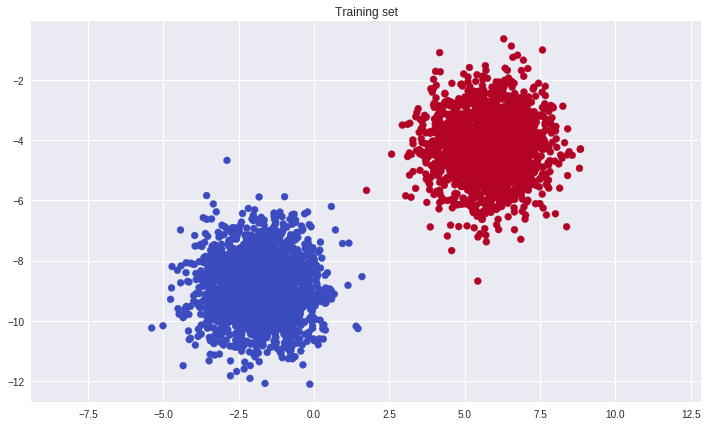

In [23]:
plt.figure(figsize=(12,7))
plt.scatter(X_train[:,0], X_train[:,1], c=y_train ,cmap=cm.coolwarm)
plt.title('Training set')
plt.axis('equal');

In [24]:
weights = model.layers[0].get_weights()[0]
biases = model.layers[0].get_weights()[1]
print("Input layer weights",weights.shape,":\n",weights)
print("Input layer biases",biases.shape,":\n",biases)

Input layer weights (2, 1) :
 [[0.30462444]
 [0.18293874]]
Input layer biases (1,) :
 [0.6005347]


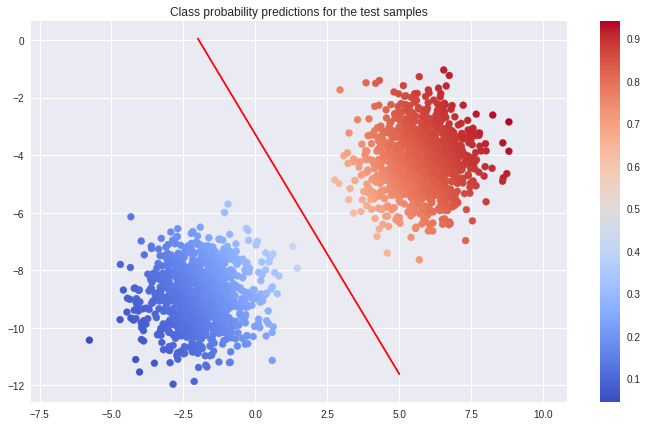

In [25]:
plt.figure(figsize =(12,7))
plt.scatter(X_test[:,0], X_test[:,1], c=prediction_values[:,0], cmap=cm.coolwarm)
plt.axis('equal');
plt.colorbar();
plt.title('Class probability predictions for the test samples')
xx = np.linspace(-2,5)
yy = -(weights[0,0]/weights[1,0])*xx - biases[0]/weights[1]
plt.plot(xx,yy,'r')